# AIR QUALITY INDEX PREDICTION

### The Air Quality Index (AQI) is a measure of air pollution levels. It provides information on the health effects associated with different pollutant concentrations. Predicting the AQI helps in understanding air pollution scenarios and taking necessary preventive measures.

The purpose of the AQI is to help people know how the local air quality impacts their health. The Central Pollution Control Board (CPCB) calculates the AQI for six major air pollutants, for which national air quality standards have been established to safeguard public health.

1. Ground-level ozone(O3)
2. Particle pollution/particulate matter (PM2.5/pm 10)
3. Carbon Monoxide(CO)
4. Sulfur dioxide(SO2)
5. Nitrogen dioxide(NO2)
6. Ammonia(NH3)

The higher the AQI value, the greater the level of air pollution and the greater the health concerns. The concept of AQI has been widely used in many developed countries for over the last three decades. AQI quickly disseminates air quality information in real-time.

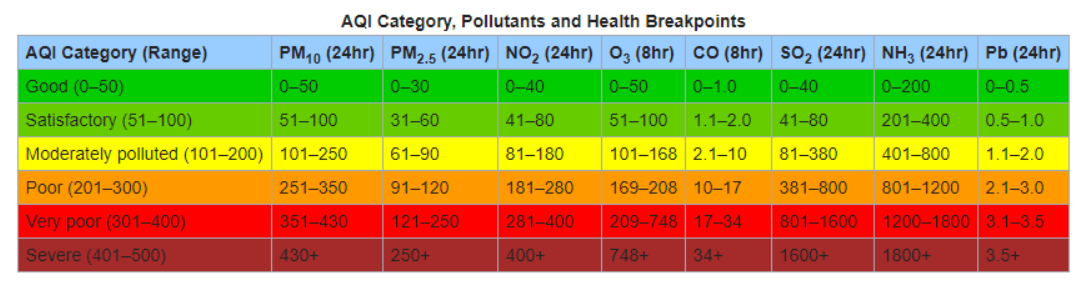

### Importing the necessary libraries

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split # To perfom train test split
from sklearn.preprocessing import StandardScaler #To perform feature scaling

### Algorithm used to build the model 

In [85]:
from sklearn.linear_model import LinearRegression   
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

### Importing Libraries for Model Evaluation and Feature Scaling

In [86]:
from sklearn.metrics import mean_squared_error, r2_score

### Loading the dataset

In [87]:
df = pd.read_csv(r"city_day.csv")

In [88]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


### Target Variable: AQI 

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


1. I can see that my data has 29531 records and 16 columns
2. Dominant data type is float64
3. There exist many null values in many features execpt city and date
4. Data type of date is given as object. So need to convert it into date datatype

In [90]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


1. There are many outliers in the data
2. Max value of AQI is 2049 which is beyond its limit. So there are some errors in the data.

### Now let me check the percentage of null values in each feature

In [91]:
df.isnull().mean() * 100

City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
Benzene       19.041008
Toluene       27.229014
Xylene        61.322001
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64

1. I can see that Xylene has highest percentage of null values followed by PM10, NH3 and Toluene
2. AQI and AQI_Bucket has same percentage of null values. That means the days for which AQI values were not calculated AQI_Bucket was also not updated.
3. Since AQI is my target feature I'll extract the records where the values are null in AQI and seperate it into testing data. 

## EDA (Exploratory Data Analysis) with Feature Engineering

Let me check unique values in each feature as well as number of unique values to check whether there are any anomalies or irregular data present in my features.

In [92]:
for i in df.columns:
    print(i,'-->',df[i].nunique())
    print(df[i].unique())

City --> 26
['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']
Date --> 2009
['2015-01-01' '2015-01-02' '2015-01-03' ... '2020-06-29' '2020-06-30'
 '2020-07-01']
PM2.5 --> 11716
[  nan 73.24 83.13 ... 33.17 25.4  24.38]
PM10 --> 12571
[   nan 141.54 122.41 ...  58.54  32.27  66.  ]
NO --> 5776
[ 0.92  0.97 17.4  ... 29.35 30.16 18.55]
NO2 --> 7404
[18.22 15.69 19.3  ... 58.99 52.1  53.59]
NOx --> 8156
[17.15 16.46 29.7  ... 42.33 45.87  7.07]
NH3 --> 5922
[  nan 26.64 25.63 ...  4.1  28.34 42.86]
CO --> 1779
[ 0.92  0.97 17.4  ...  4.85  5.59  4.56]
SO2 --> 4761
[27.64 24.55 29.07 ... 26.63 31.16 21.67]
O3 --> 7699
[133.36  34.06  30.7  ...  70.53  60.29  34.85]
Benzene --> 1873
[ 0.    3.68  6.8  ...  8.1   8.85 10.32]
Toluene --> 3608
[2.

1. There are 26 cities in our study
2. Data is from 1st Jan,2015 - 1st July 2020
3. There are values beyond 500 in AQI which is beyond the limit. So need to treat it.

Let me check whether there are any duplicated values

In [93]:
df[df.duplicated()]

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket


There are no duplicate values to drop.

First let's extract day, month and year from date column to treat the null values better

In [94]:
df['Day'] = pd.to_datetime(df.Date,format = "%Y-%m-%d").dt.day
df['Month'] = pd.to_datetime(df.Date,format = "%Y-%m-%d").dt.month
df['Year'] = pd.to_datetime(df.Date,format = "%Y-%m-%d").dt.year

Now we can drop the date column

In [95]:
df.drop('Date',axis=1,inplace=True)

In [96]:
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Day,Month,Year
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,1,1,2015
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2,1,2015
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,3,1,2015
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,4,1,2015
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,5,1,2015


#### Here we can see 3 separate columns have created for Day, Month and Year. Hence we can group the year and month to better fill in the null values

#### Let me first concat Benzene, Toluene and Xylene as BTX as they are mostly taken together to study their affect on air pollution and also their sources are very similar(gasoline, paint, crude oil, phenol, acetone etc.)

In [97]:
df1 = df.copy()   # Making a backup copy

In [98]:
## First filling the null values as 0 so as to concat them
df1['Xylene'] = df1['Xylene'].fillna(0)
df1['Benzene']= df1['Benzene'].fillna(0)
df1['Toluene']= df1['Toluene'].fillna(0)

In [99]:
df1['BTX'] = df1['Benzene']+df1['Toluene']+df1['Xylene']

In [100]:
df1.drop(df1[['Benzene','Toluene','Xylene']],axis=1,inplace=True)  #Dropping original columns

In [101]:
df1.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,Day,Month,Year,BTX
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,NaN,NaN,1,1,2015,0.02
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,NaN,NaN,2,1,2015,12.95
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,NaN,NaN,3,1,2015,25.45
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,NaN,NaN,4,1,2015,15.57
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,NaN,NaN,5,1,2015,28.68


#### Let me check for collinearity and drop those columns before imputing null values

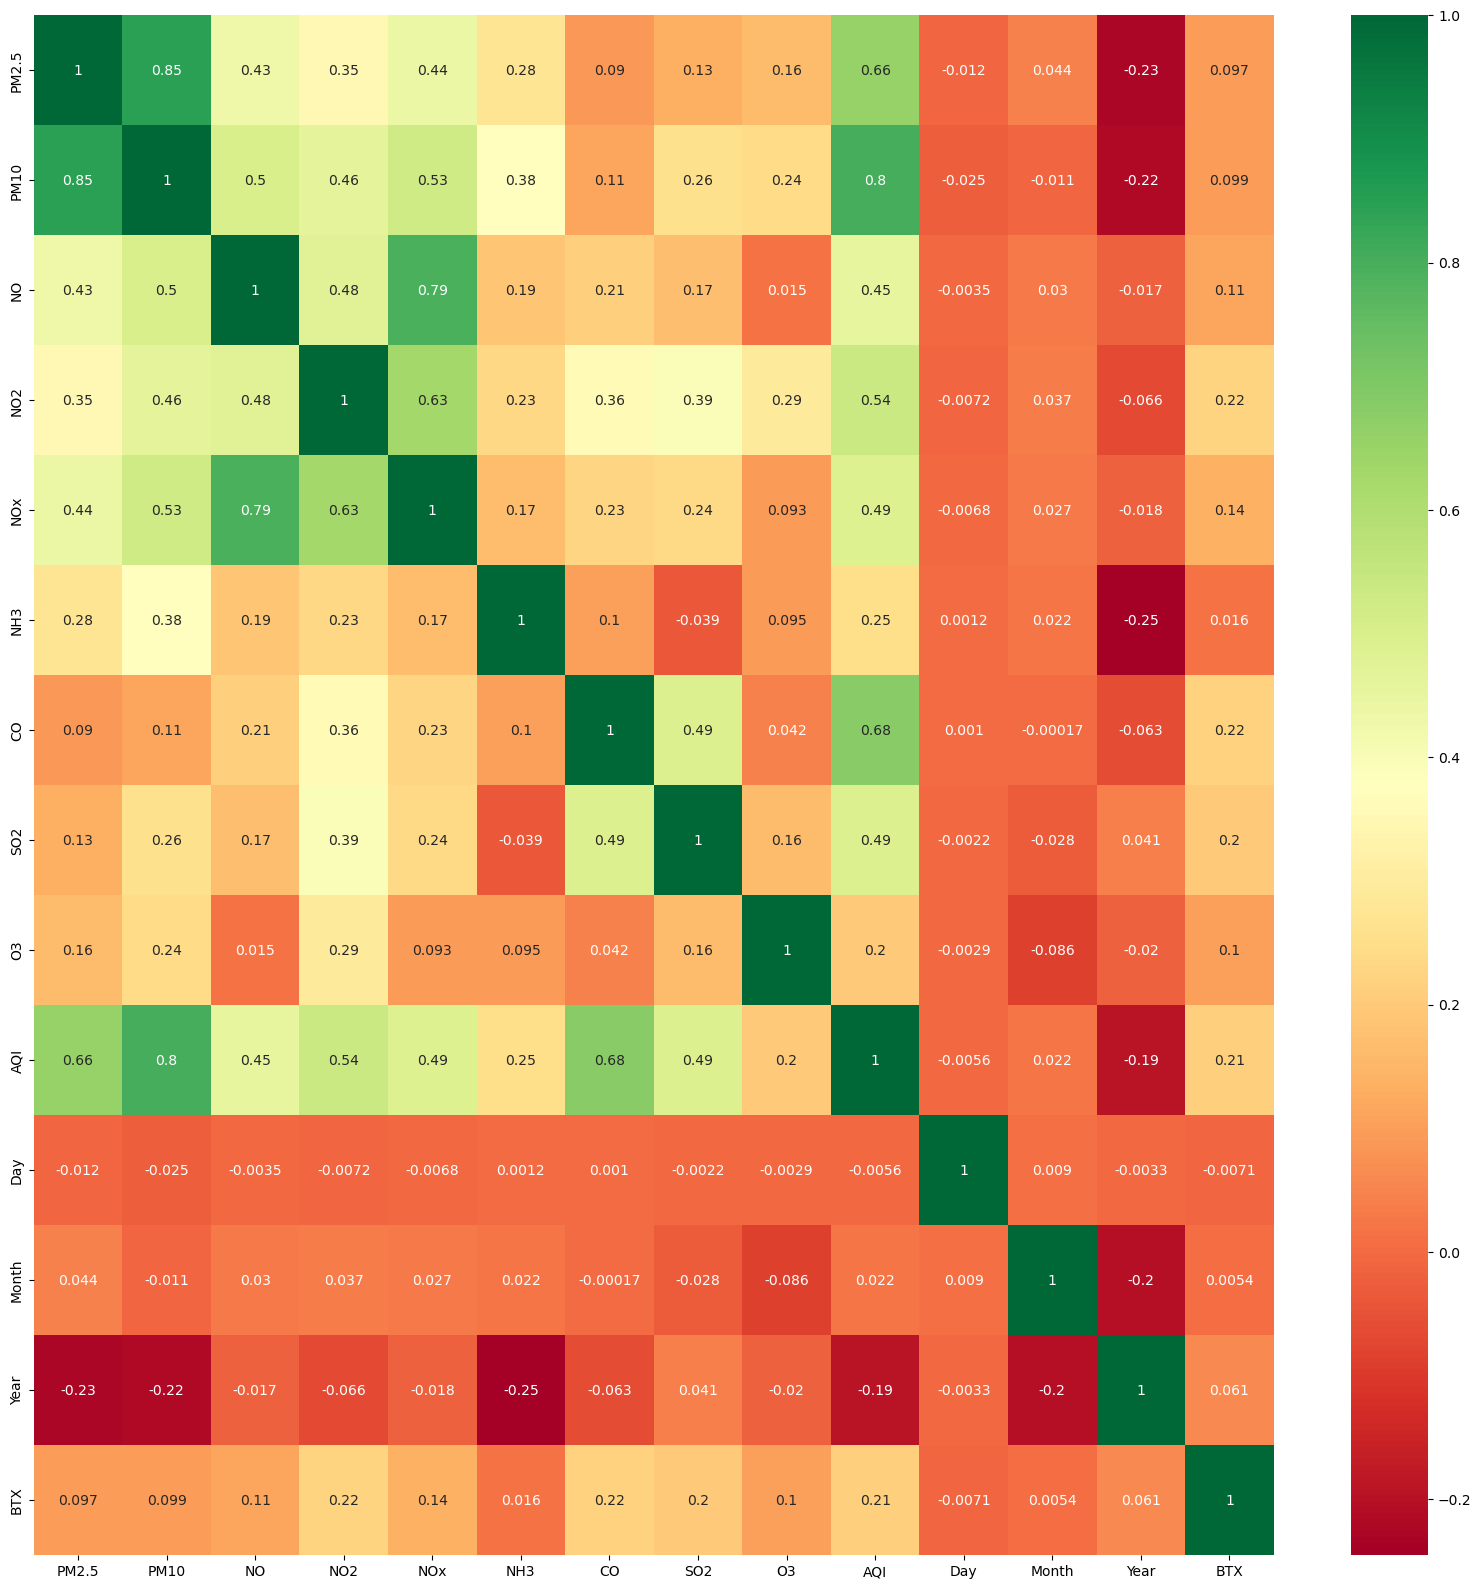

In [102]:
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Here we can see that NO,NOx and NO2 are highly correlated. NO2 has higest correlation to target variable. Hence let me drop NOx and NO.

In [103]:
df1.drop(df1[['NOx','NO']],axis=1,inplace=True)

In [104]:
df1.head()

,City,PM2.5,PM10,NO2,NH3,CO,SO2,O3,AQI,AQI_Bucket,Day,Month,Year,BTX
0,Ahmedabad,NaN,NaN,18.22,NaN,0.92,27.64,133.36,NaN,NaN,1,1,2015,0.02
1,Ahmedabad,NaN,NaN,15.69,NaN,0.97,24.55,34.06,NaN,NaN,2,1,2015,12.95
2,Ahmedabad,NaN,NaN,19.30,NaN,17.40,29.07,30.70,NaN,NaN,3,1,2015,25.45
3,Ahmedabad,NaN,NaN,18.48,NaN,1.70,18.59,36.08,NaN,NaN,4,1,2015,15.57
4,Ahmedabad,NaN,NaN,21.42,NaN,22.10,39.33,39.31,NaN,NaN,5,1,2015,28.68


Now let me proceed with filling null values. First let me check for outliers to check which method I can use to impute null values.



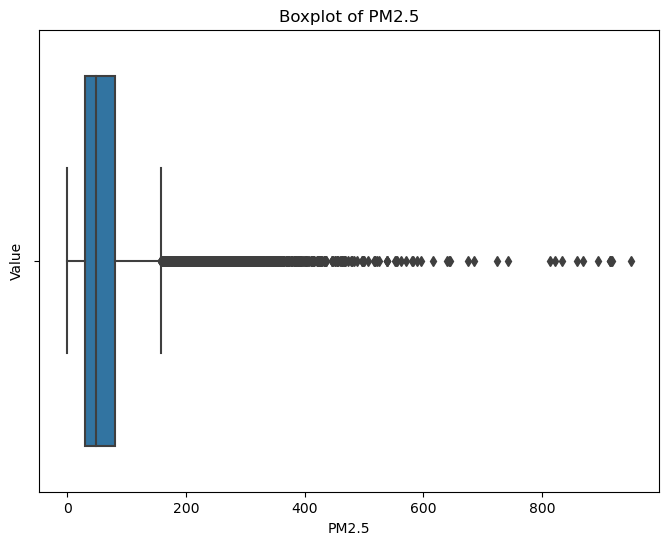

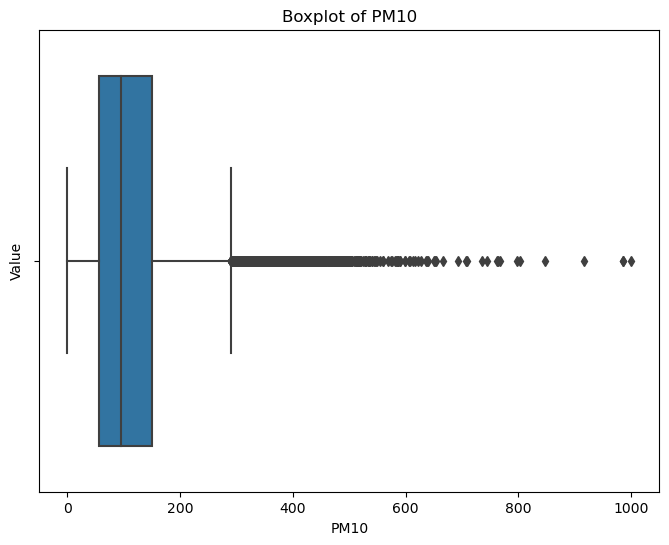

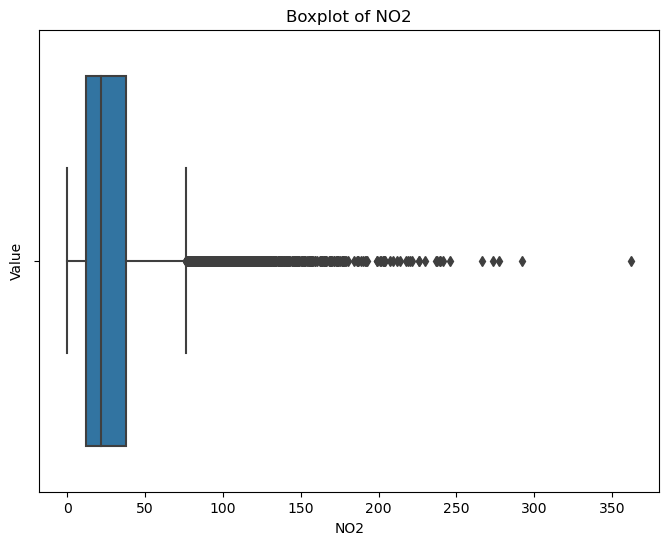

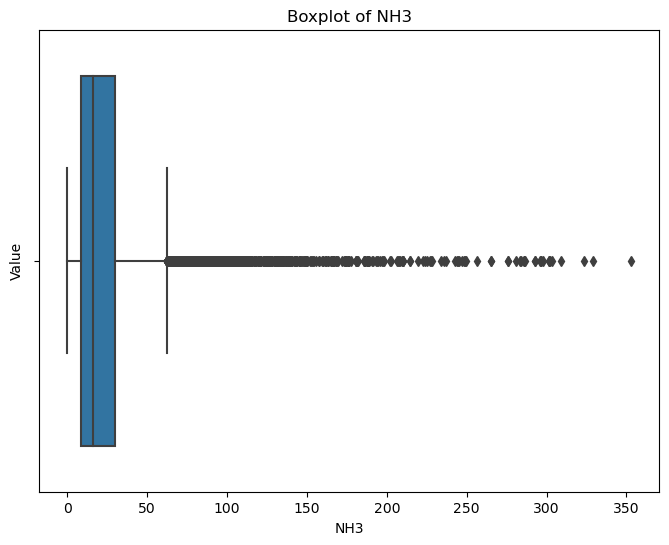

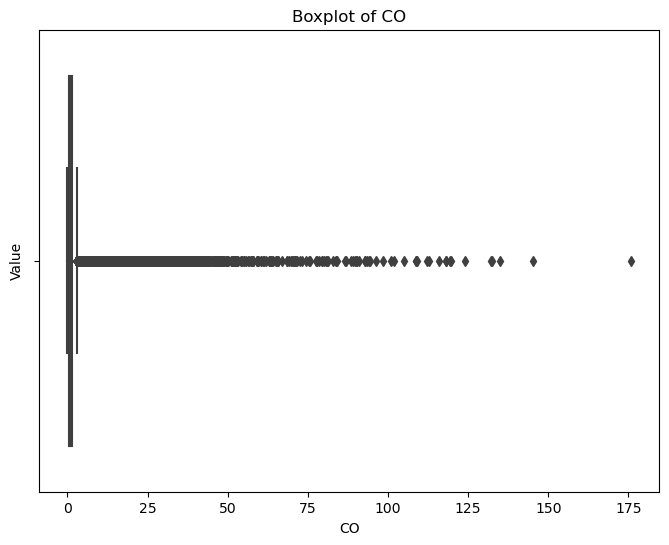

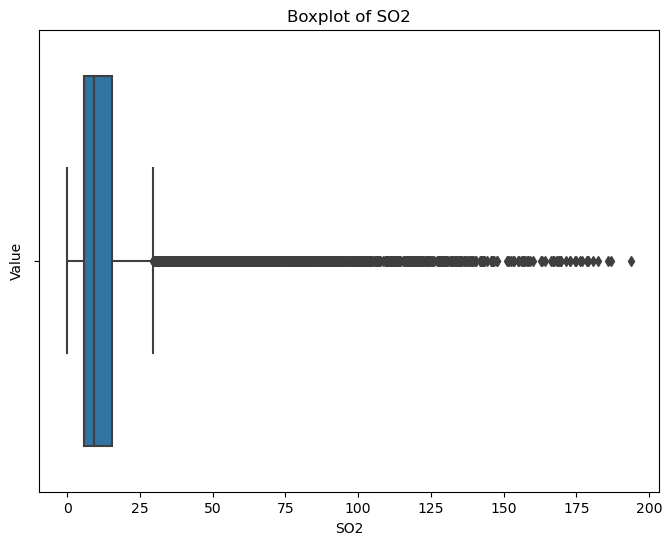

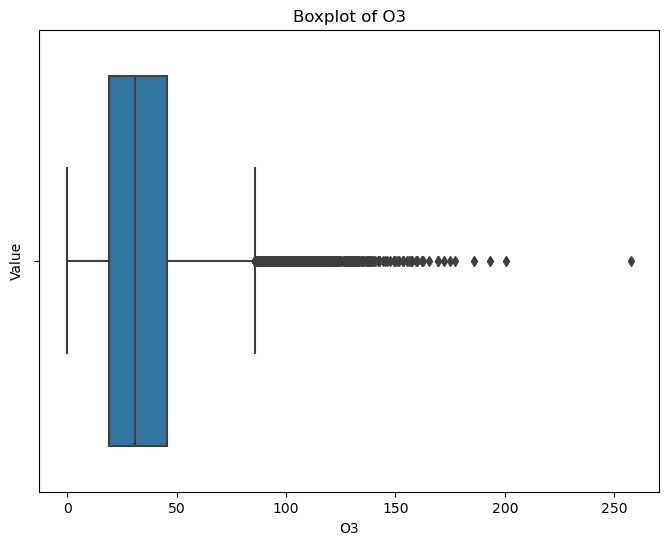

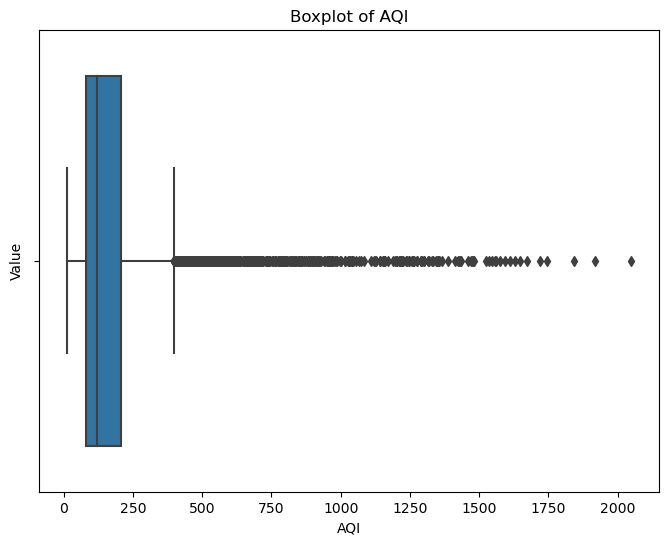

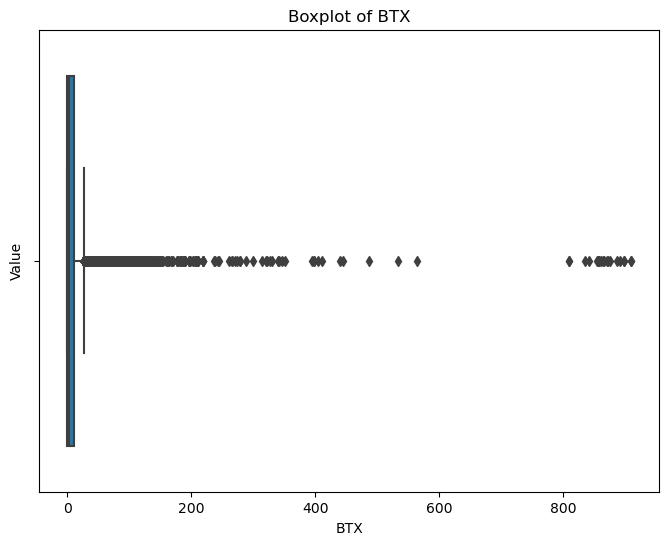

In [105]:
continuous_features = df1.select_dtypes(include=['float64']).columns

# Plot boxplots for each continuous feature
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df1[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('Value')
    plt.show()

Since there are many outliers I'll be using median to fill in the null values. I'm keeping these outliers since values of pollutants can go upto the maximum values and we'll be needing it for model building

In [106]:
df1.isnull().sum()

City              0
PM2.5          4598
PM10          11140
NO2            3585
NH3           10328
CO             2059
SO2            3854
O3             4022
AQI            4681
AQI_Bucket     4681
Day               0
Month             0
Year              0
BTX               0
dtype: int64

#### Filling null values of pollutants by corresponding city,year and month

In [107]:
features_to_transform = ['PM2.5', 'PM10', 'NO2', 'NH3', 'CO', 'SO2', 'O3']

for feature in features_to_transform:
    df1[feature] = df1[feature].replace(0, np.nan)  #Replacing 0 values with NaN
    df1[feature] = df1.groupby(['Year', 'Month','City'])[feature].transform(lambda x: x.fillna(x.median()))

In [108]:
df1.isnull().sum()

City             0
PM2.5         3249
PM10          9724
NO2           2116
NH3           9023
CO            2499
SO2           2055
O3            2204
AQI           4681
AQI_Bucket    4681
Day              0
Month            0
Year             0
BTX              0
dtype: int64

#### Filling rest of the null values with the median values of the pollutants by corresponding year and city since that corresponding month won't be having any records of that particular pollutant

In [109]:
features_to_transform = ['PM2.5', 'PM10', 'NO2', 'NH3', 'CO', 'SO2', 'O3']

for feature in features_to_transform:
    df1[feature] = df1[feature].replace(0, np.nan)
    df1[feature] = df1.groupby(['Year','City'])[feature].transform(lambda x: x.fillna(x.median()))

In [110]:
df1.isnull().sum()

City             0
PM2.5         1764
PM10          7750
NO2           1108
NH3           7019
CO            1096
SO2            743
O3             893
AQI           4681
AQI_Bucket    4681
Day              0
Month            0
Year             0
BTX              0
dtype: int64

#### Certain pollutants doesn't have records for certain years. So imputing them with the corresponding median values of that city

In [111]:
features_to_transform = ['PM2.5', 'PM10', 'NO2', 'NH3', 'CO', 'SO2', 'O3']

for feature in features_to_transform:
    df1[feature] = df1[feature].replace(0, np.nan)
    df1[feature] = df1.groupby('City')[feature].transform(lambda x: x.fillna(x.median()))

In [112]:
df1.isnull().sum()

City             0
PM2.5            0
PM10          2009
NO2              0
NH3           2009
CO               0
SO2              0
O3             162
AQI           4681
AQI_Bucket    4681
Day              0
Month            0
Year             0
BTX              0
dtype: int64

In [113]:
Features = ['PM10', 'NH3', 'O3']

# creating a boolean mask for rows where any of the specified columns have NaN values
mask = df1[Features].isna().any(axis=1)

# Filtering the DataFrame to get rows where any of the specified columns have NaN values
rows_with_null = df1[mask]

cities_with_null = rows_with_null['City'].unique()

print(cities_with_null)

['Ahmedabad' 'Ernakulam' 'Lucknow']


1. Ahmedabad doesn't have any data for PM10 values.
2. Ernakulam doesn't have any data for O3 values.
3. Lucknow doesn't have any data for NH3 values.

### So imputing the null values with the median value of that particular feature

In [114]:
df1[['PM10', 'NH3', 'O3']] = df1[['PM10', 'NH3', 'O3']].transform(lambda x: x.fillna(x.median()))

In [115]:
df1.isnull().sum()

City             0
PM2.5            0
PM10             0
NO2              0
NH3              0
CO               0
SO2              0
O3               0
AQI           4681
AQI_Bucket    4681
Day              0
Month            0
Year             0
BTX              0
dtype: int64

### All the null values have been treated

Initializing values for AQI_Bucket based on AQI so that it can predict the values corresposding to AQI while giving the data for testing

In [116]:
df1['AQI_Bucket'] = df1.apply(lambda x: np.nan if pd.isnull(x['AQI']) else 'Good' if x['AQI'] < 51 else 'Satisfactory' if 51 <= x['AQI'] < 101 else 'Moderate' if 101 <= x['AQI'] < 201 else 'Poor' if 201 <= x['AQI'] < 301 else 'Very Poor' if 301 <= x['AQI'] < 401 else 'Severe' if 401 <= x['AQI'] < 501 else '', axis=1)

In [117]:
df1.drop(df1[df1['AQI'] > 500].index, inplace=True)
#dropping values of AQI above 500 since AQI values cannot be above 500. These records must be dropped for building more accurate models

### Now let me seperate the rows where AQI values is null to testing data. I will create a machine learning model to predict AQI values with the rest of the data and then predict values of AQI for test data

In [118]:
test_data = df1[(df1['AQI'].isna())&(df1['AQI_Bucket'].isna())]
# Drop 'Day' and 'Year' columns from test data
test_data.drop(['Day', 'Year'], axis=1, inplace=True)
df1.dropna(subset=['AQI','AQI_Bucket'],inplace=True)

## Data Visualization 

Now let's gain many insights into the data

In [119]:
df1.head()

,City,PM2.5,PM10,NO2,NH3,CO,SO2,O3,AQI,AQI_Bucket,Day,Month,Year,BTX
28,Ahmedabad,83.13,116.2,28.71,17.95,6.93,49.52,59.76,209.0,Poor,29,1,2015,3.16
29,Ahmedabad,79.84,116.2,28.68,17.95,13.85,48.49,97.07,328.0,Very Poor,30,1,2015,4.85
34,Ahmedabad,80.65,116.2,22.83,17.95,2.37,25.73,47.30,294.0,Poor,4,2,2015,0.00
35,Ahmedabad,58.36,116.2,21.39,17.95,2.60,32.66,53.54,149.0,Moderate,5,2,2015,0.00
36,Ahmedabad,79.29,116.2,26.94,17.95,1.16,67.41,59.30,190.0,Moderate,6,2,2015,0.00


### Let's check top 10 cities with highest average AQI vlaues, hence we will get to know which cities are having worst air quality from 2015-2020

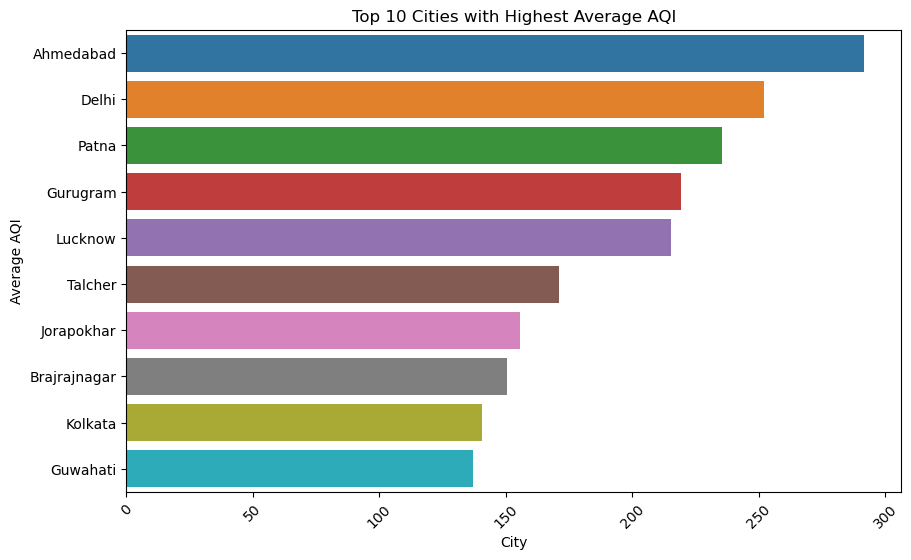

In [120]:
# Calculating average AQI values for each city
avg_aqi = df1.groupby('City')['AQI'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_aqi.head(10), y=avg_aqi.head(10).index)
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.title('Top 10 Cities with Highest Average AQI')
plt.xticks(rotation=45)
plt.show()

### We can see that Ahmedabad has highest highest average value of AQI meaning that air pollution will be a major concern there. Also it is followed by Delhi, Patna, Gurugram and Lucknow

Though polluting vehicles and industries are largely blamed  ..

Read more at:
http://timesofindia.indiatimes.com/articleshow/67631586.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst

In 2001, Ahmedabad was ranked the fourth most polluted city ..

Read more at:
http://timesofindia.indiatimes.com/articleshow/70210192.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst

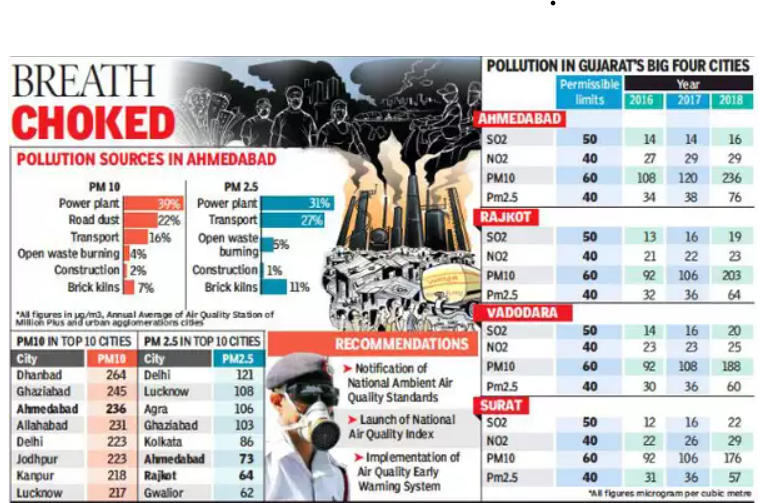

Both the above articles and image is from an article in 2019 featured in Times of India stating why Ahmedabad is experiencing very severe air pollution. We can see that PM10 is a cause of major concern in Ahmedabad since there are many coal based power plants situated there which is the greatest contributor to the PM10 values in Ahmedabad, followed by road dust and vehicular pollution.

### PM2.5 and PM10 are one of the major concerns of air quality in every city. Let us check how does this vary between the cities in our study

<AxesSubplot:title={'center':'Average PM 2.5 Levels in different cities'}, ylabel='City'>

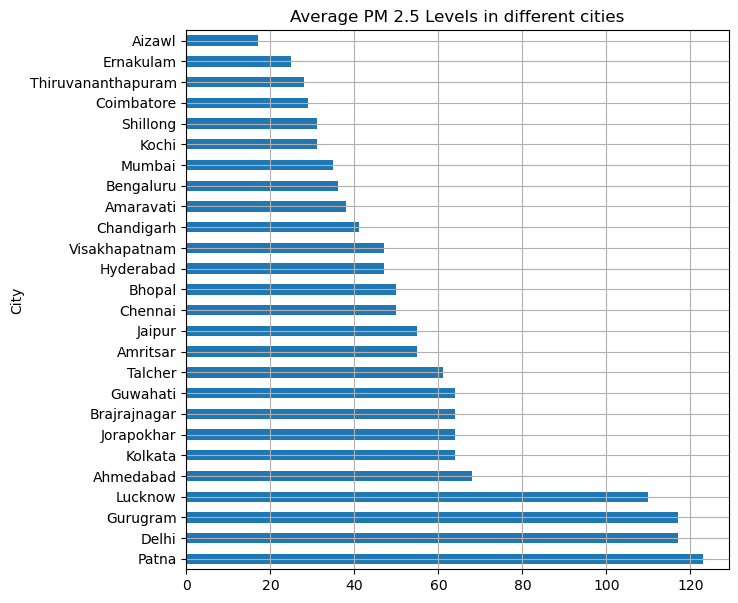

In [121]:
# Arranging city wise PM 2.5 levels mean values 
avg_pm2_5=df.groupby("City")["PM2.5"].mean().sort_values(ascending=False).round()

# Plotting the horizontal bar plot for cities against PM 2.5 level value.
avg_pm2_5.plot(figsize=(7,7),kind="barh",title="Average PM 2.5 Levels in different cities", ylabel="City",grid=True)

https://timesofindia.indiatimes.com/city/patna/patnas-air-quality-worse-than-delhi-and-ncr/articleshow/71960360.cms

In 2017, concentrations of PM2.5 — the most dangerous type of particulate pollution — in Patna’s busiest streets met Indian air quality standards only 81 out of the 311 days that were monitored. On the worst days, the city can experience astronomical levels — sometimes higher than 600 micrograms per cubic meter of PM2.5 (see chart below). That is 60 times the World Health Organization’s recommended safe limit and 15 times the safety benchmark set by Indian government. This year, the WHO called Patna the world’s fifth-most polluted city, with Delhi following close behind.

The above is taken from this article - https://undark.org/2018/08/08/air-pollution-patna/ - 08-08-2018

Each morning in Patna, tens of thousands of small coal fires are lit across the city. Coal burning is a major contributor to PM 2.5 pollution in Patna and such small-scale fires, used for heating and cooking, release toxic gases both inside homes and on the streets. Studies of exposure to household air pollution have shown clear impacts, including lower respiratory infections, cardio-pulmonary diseases, cataracts, and lung cancer.

https://www.sciencealert.com/new-delhi-s-air-is-now-so-toxic-schools-are-closing-and-expats-are-fleeing - 07 November 2016

In 2016 the Indian government had declared a national emergency, as air pollution in its capital, New Delhi, had reached levels more than 16 times the safe limit.

https://www.hindustantimes.com/delhi-news/delhi-air-pollution-salt-from-afghanistan-pushing-up-pm2-5-levels-says-study/story-E9vxfRYaygYbRQFKSuPgLN.html  - Dec 20, 2017

During the months of winter, Delhi usually gets winds from the north and north-west coming all the way from west Asia. CPCB report says air-borne salt particles originating from large salt pans in Afghanistan are pushing up pollution levels in Delhi.

https://www.firstpost.com/india/gurugram-is-worlds-most-polluted-city-delhi-tops-worst-national-capitals-finds-greenpeace-report-on-air-quality-6197541.html -  - March 05, 2019

Gurugram is world's most polluted city, Delhi tops worst national capitals, finds Greenpeace report on air quality

We can see that our references also aligns with the real time news

### Let's check how much other pollutants affect each cities

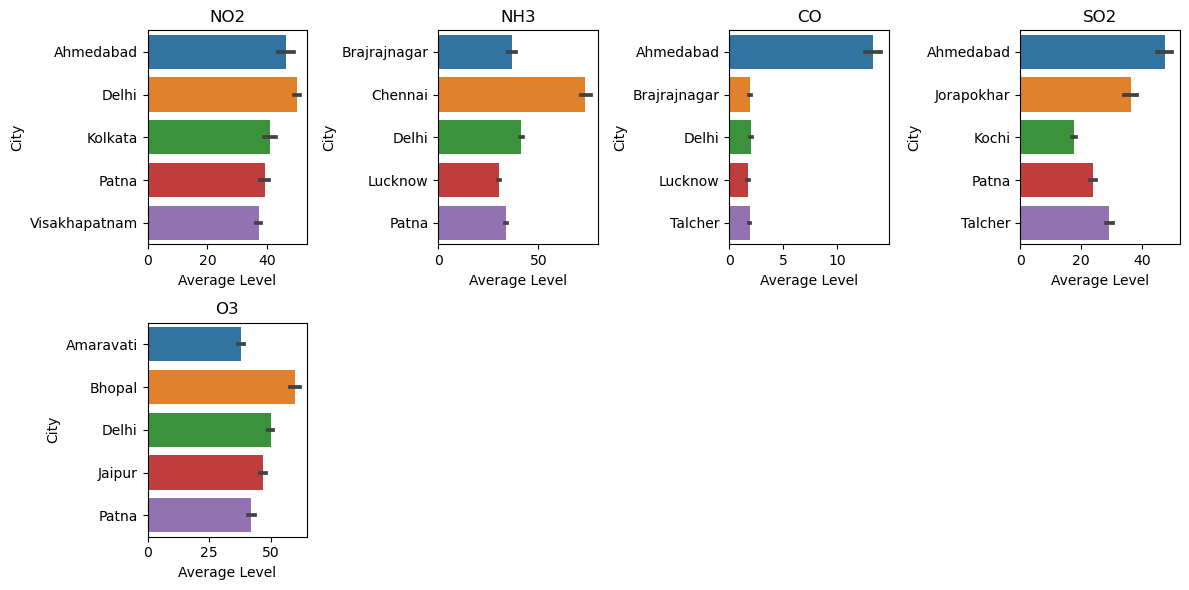

In [122]:
avg_pollutant_levels = df1.groupby('City')['NO2', 'NH3', 'CO', 'SO2', 'O3'].mean()

# Identify top 5 cities for each pollutant
top_5_cities = {}
for pollutant in avg_pollutant_levels.columns:
    top_5_cities[pollutant] = avg_pollutant_levels.nlargest(5, pollutant).index.to_list()

plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(avg_pollutant_levels.columns):
    plt.subplot(2, 4, i+1)
    sns.barplot(x=pollutant, y='City', data=df1[df1['City'].isin(top_5_cities[pollutant])])
    plt.xlabel('Average Level')
    plt.ylabel('City')
    plt.title(f'{pollutant}')
plt.tight_layout()
plt.show()

### Insights:

**Delhi**, **Ahmedabad** and **Kolkata** has high levels of **NO2**. NO2 primarily gets in the air from the burning of fuel. Vehicular emissions are the primary source of NO2 in the national capital.https://www.hindustantimes.com/india-news/no2-levels-hazardous-in-many-traffic-heavy-areas-101637796212928.html

**Chennai** has high levels of **NH3(Ammonia)** followed by **Delhi and Patna**.Ammonia leak from Madras Fertilizers Limited worries residents in Chennai's Manali. https://www.newindianexpress.com/cities/chennai/2020/may/16/ammonia-leak-from-madras-fertilizers-limited-worries-residents-in-chennais-manali-2143878.html

**Carbon monoxide(CO)** is very high in **Ahmedabad** compared to other cities. Major contributor to CO is vehicular emission and power plants.

India is the world's largest emitter of **SO2**. Of the 45 hotspots in India, emissions at 43 are due to coal-based electricity generation, while pollution at the remaining two is caused by metal smelters. **Maharashtra and Gujarat** are the worst emitters of sulphur dioxide (SO2) in India, according to a recent study conducted by Greenpeace.https://www.downtoearth.org.in/news/air/maharashtra-gujarat-top-sulphur-dioxide-polluters-in-india-66250

Bhopal, Delhi and Jaipur are having more ground level ozone.

### Now let's see how each pollutant's affect has changed over the years from 2015-2020 in major cities

### PM2.5 over the years in major cities where it was very high 

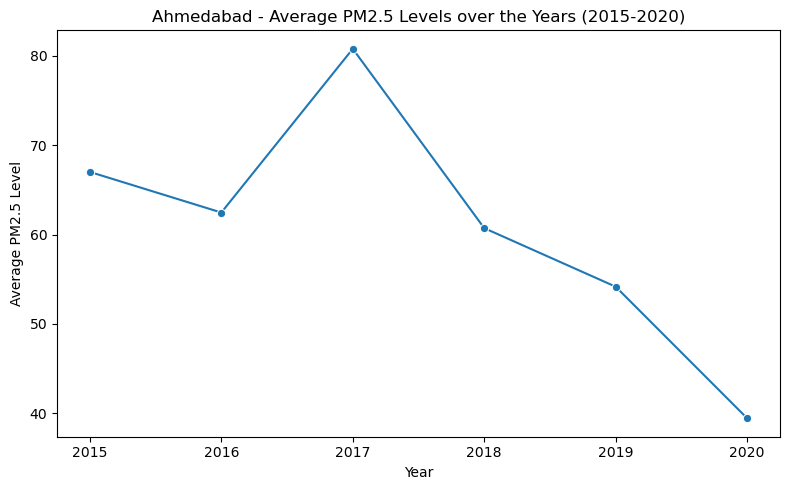

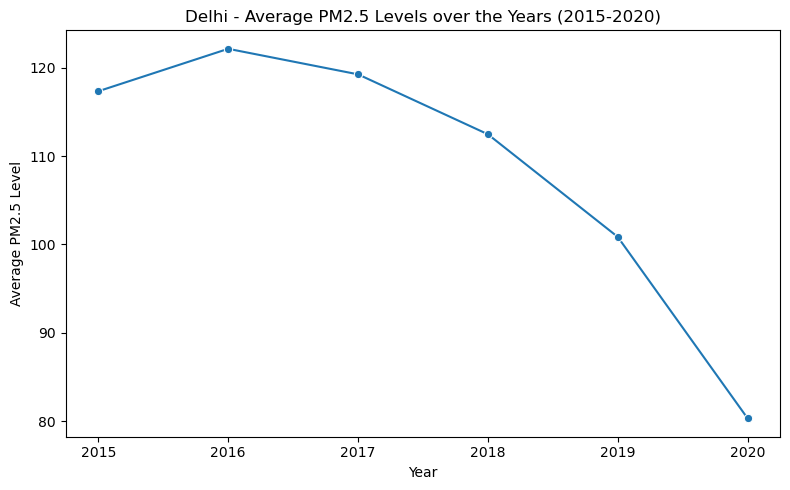

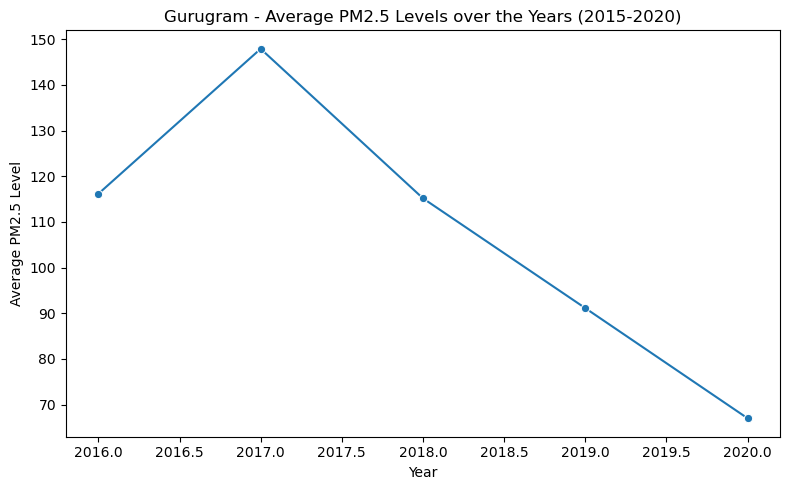

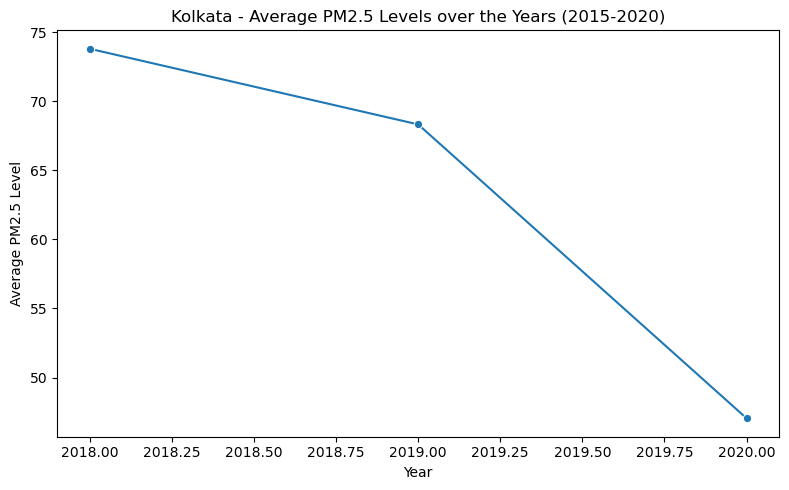

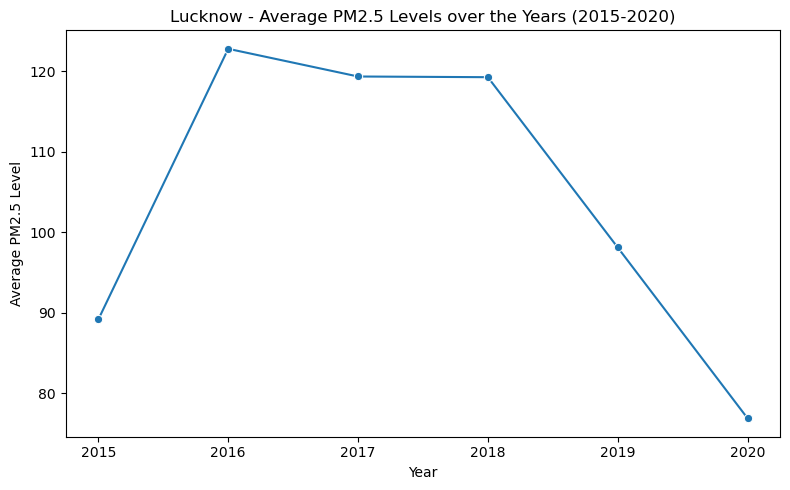

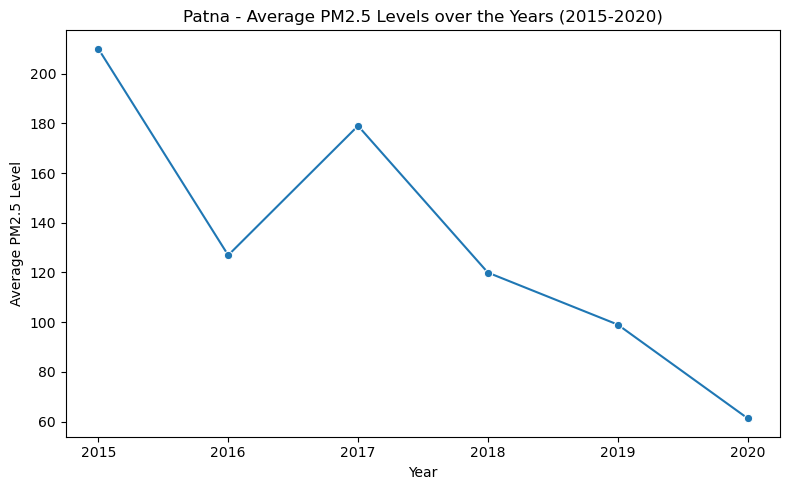

In [123]:
# Filter the data for Delhi and Ahmedabad from 2015 to 2020
df_filtered = df1[(df1['City'].isin(['Delhi', 'Ahmedabad','Gurugram','Kolkata','Patna','Lucknow'])) & (df1['Year'].between(2015, 2020))]

# Calculate average PM2.5 values for each year
avg_pm25 = df_filtered.groupby(['City', 'Year'])['PM2.5'].mean().reset_index()

# Create separate line plots for each city
for city in df_filtered['City'].unique():
    plt.figure(figsize=(8, 5))
    sns.lineplot(x='Year', y='PM2.5', data=avg_pm25[avg_pm25['City'] == city], marker='o')
    plt.xlabel('Year')
    plt.ylabel('Average PM2.5 Level')
    plt.title(f'{city} - Average PM2.5 Levels over the Years (2015-2020)')
    plt.tight_layout()
    plt.show()

### Insights:

Since most of the values were null and we imputed them with median values and also certain cities didn't have any value for PM2.5 for few years, figures may not be accurate. But we'll get a rough idea about the change in trend

We can see that there was a sudden spike in pm2.5 levels in 2017

Delhi became the most polluted city in the world in 2017 - https://www.vox.com/energy-and-environment/2017/11/22/16666808/india-air-pollution-new-delhi. 

Gurugram is in the border of delhi and haryana. So Gurugram is also experiencing very high PM2.5 levels in the year of 2017. It can also be due to stubble burning in Haryana.

There were over 1.24 mn deaths in 2017 due to air pollution in India - https://www.business-standard.com/article/current-affairs/over-1-24-mn-deaths-in-2017-due-to-air-pollution-in-india-says-study-118120600761_1.html

We can see that there is a sudden dip in the values of PM2.5 in the year of 2020. This was because since lockdown was imposed in India on March 2020. Hence during Covid-19 lockdowns the pollution levels drastically reduced since there was very less vehicluar emissions and other activities which contributed to air pollution. 
https://edition.cnn.com/2020/04/22/world/air-pollution-reduction-cities-coronavirus-intl-hnk/index.html

### PM10 values were mostly null so to get a good idea about the trend of PM10 values are difficult.

### Let's look at how SO2,CO AND NO2 have affected major Indian cities in the past

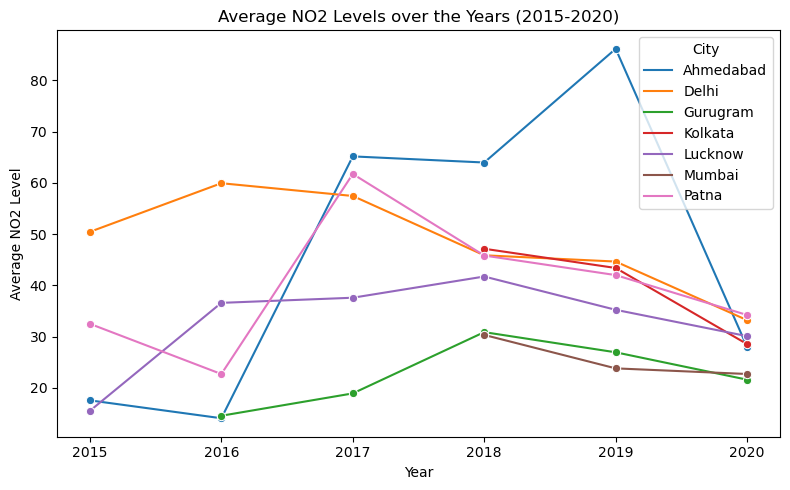

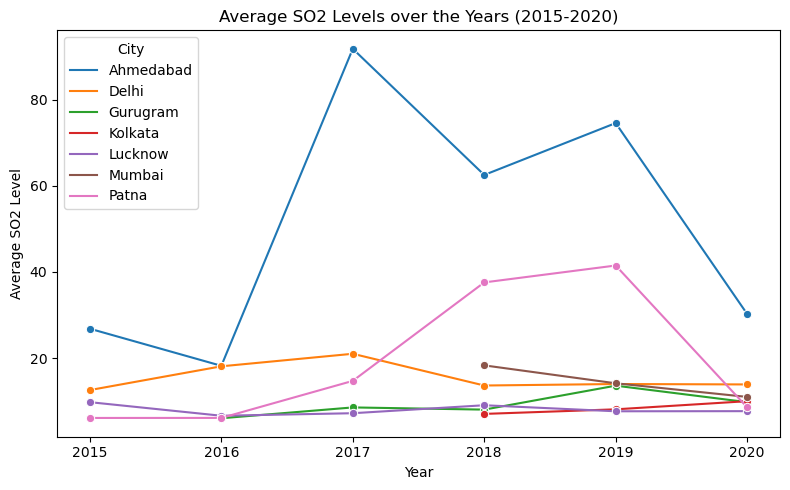

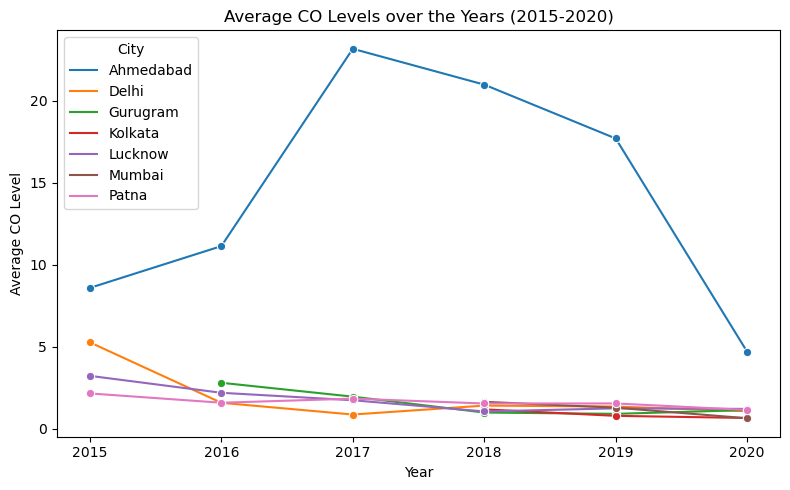

In [124]:
# Filter the data for Delhi and Ahmedabad from 2015 to 2020
df_filtered = df1[(df1['City'].isin(['Delhi', 'Ahmedabad','Gurugram','Kolkata','Patna','Lucknow','Mumbai'])) & (df1['Year'].between(2015, 2020))]

# Calculate average pollutant values for each year
avg_pollutants = df_filtered.groupby(['City', 'Year']).mean().reset_index()

# Define the pollutants to plot
pollutants = ['NO2', 'SO2', 'CO']

# Create separate line plots for each pollutant
for pollutant in pollutants:
    plt.figure(figsize=(8, 5))
    sns.lineplot(x='Year', y=pollutant, hue='City', data=avg_pollutants, marker='o')
    plt.xlabel('Year')
    plt.ylabel(f'Average {pollutant} Level')
    plt.title(f'Average {pollutant} Levels over the Years (2015-2020)')
    plt.legend(title='City')
    plt.tight_layout()
    plt.show()

### Insights:

We can see that there is a sudden spike in pollutant reading in 2017 in Ahmedabad. This is because **India’s first air pollution warning system was inroduced in Ahmedabad in 2017** - https://scroll.in/article/839248/indias-first-air-pollution-warning-system-in-ahmedabad-hopes-to-reduce-deaths-health-hazards

This made sure that readings were taken in very robust manner in Ahmedabad compared to other cities.

Mumbdai experienced high sulphur emissions in 2017. This is due to the usage of furnace oil in industries and vehicular emission in Maharashtra.https://mumbaimirror.indiatimes.com/mumbai/cover-story/inhell-exhell/articleshow/62003949.cms

Mumbai was identified as the second most polluted megacity in India with maximum sulphur dioxide (SO2) emissions in 2018. According to a Greenpeace report - Global SO2 Emission Hotspot Database – Mumbai generated 42 kilotonnes (kt) SO2 per year in 2018 - https://www.hindustantimes.com/mumbai-news/industries-in-critically-polluted-areas-need-to-reduce-so2-emission-by-90/story-zrRkO8WRy5ItXcA2yZ2EfI.html

https://www.hindustantimes.com/mumbai-news/deadly-pollutants-in-mumbai-s-air-have-soared-in-past-10-years/story-6SmHgOAAYk7r8nQyu8KWII.html

Readings were taken more consistently after 2019 in India. So the graphs has some anomalies. 


### So our visualization part is over. Now let's move on to Model Building 

### Doing Label Encoding for City feature  

In [125]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Fit the LabelEncoder to the 'city' column and transform the values
df1['City'] = le.fit_transform(df1['City'])

We won't be requiring day and year for prediction. We'll keep the month feature since it can be useful for prediction. Since pollutants can vary with different seasons.

In [126]:
df1.drop(df1[['Day','Year']],axis=1,inplace=True)

In [127]:
df1.isnull().sum()

City          0
PM2.5         0
PM10          0
NO2           0
NH3           0
CO            0
SO2           0
O3            0
AQI           0
AQI_Bucket    0
Month         0
BTX           0
dtype: int64

Doing log transformation to make target variable normally distributed to fe

### Seperating Independent and Target variable

In [130]:
X = df1[[i for i in df1.columns if i not in ["AQI","AQI_Bucket"]]]
y= df1["AQI"]

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)  #performing train-test-split

In [132]:
sc=StandardScaler() #To perform feature scaling
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [48]:
# Defining the models
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
}

for model_name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)
    
    # Predicting for train and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training performance
    training_accuracy = r2_score(y_train, y_train_pred)
    training_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Testing performance
    test_data_accuracy = r2_score(y_test, y_test_pred)
    test_data_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    print(model_name)
    
    print('Model performance for training set')
    print(f'Accuracy: {training_accuracy:.2f}')
    print(f'RMSE: {training_rmse:.4f}')
    
    print('----------------------')
    
    print('Model performance for testing set')
    print(f'Accuracy: {test_data_accuracy:.4f}')
    print(f'RMSE: {test_data_rmse:.4f}')
    
    print('=' * 30)
    print('\n')

Linear Regression
Model performance for training set
Accuracy: 0.82
RMSE: 43.3538
----------------------
Model performance for testing set
Accuracy: 0.8310
RMSE: 41.6453


SVR
Model performance for training set
Accuracy: 0.83
RMSE: 42.0659
----------------------
Model performance for testing set
Accuracy: 0.8323
RMSE: 41.4796


Decision Tree
Model performance for training set
Accuracy: 1.00
RMSE: 0.0434
----------------------
Model performance for testing set
Accuracy: 0.8431
RMSE: 40.1244


Random Forest
Model performance for training set
Accuracy: 0.99
RMSE: 10.7643
----------------------
Model performance for testing set
Accuracy: 0.9221
RMSE: 28.2776


GradientBoostingRegressor
Model performance for training set
Accuracy: 0.92
RMSE: 28.4605
----------------------
Model performance for testing set
Accuracy: 0.9135
RMSE: 29.7864




### Since my random forest is giving me the highest accuracy for test data, I'll perform randomized search to fine tune the model

In [152]:
random_grid = {'n_estimators':[100,200,300,400,500],
              'max_features':['auto', 'sqrt'],
              'max_depth':[7,8,9,10,11,12],
              'min_samples_split':[2,6,8,10,14],
              'min_samples_leaf':[3,4,5,8,10],
              'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
              }

In [153]:
from sklearn.model_selection import RandomizedSearchCV

RF_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv=3,random_state = 42)

In [89]:
RF_model.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [7, 8, 9, 10, 11, 12],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [3, 4, 5, 8, 10],
                                        'min_samples_split': [2, 6, 8, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42)

In [90]:
# best Parameter
RF_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 12,
 'criterion': 'friedman_mse'}

In [49]:
RF = RandomForestRegressor(n_estimators = 200,max_features='sqrt',criterion='friedman_mse',max_depth=12,min_samples_split=6,min_samples_leaf=10)
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  25.588232295408506
rmse_test =  28.832450037256738
train_score =  0.9379833807140123
test_score =  0.9189933041159287


### Feature Selection

In [133]:
RF = RandomForestRegressor()

Feature Importances:
City: 0.0066738338649294454
PM2.5: 0.7246149577623447
PM10: 0.04861396613035763
NO2: 0.023550347162084557
NH3: 0.008751389690027285
CO: 0.14626341379244628
SO2: 0.012621273336932127
O3: 0.015032850733370918
Month: 0.004590101983069266
BTX: 0.009287865544437656


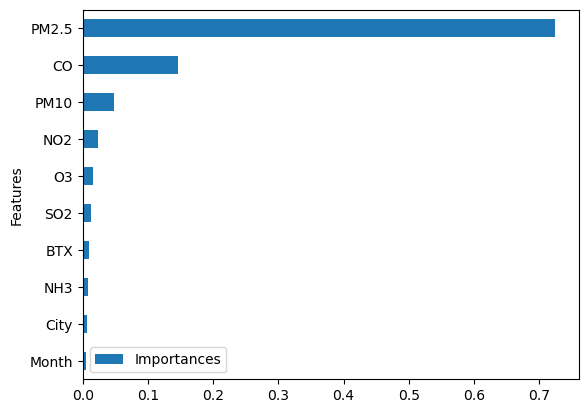

In [134]:
# Fit the model to the data
RF.fit(X, y)

# Get the feature importances
importances = RF.feature_importances_
feature_names = X.columns

# Print the feature importances
print("Feature Importances:")
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance}")

# Creating a dataframe for visualization
final_df = pd.DataFrame({'Features':feature_names,"Importances":importances})
final_df.set_index('Features',inplace=True)
sorted_importances = final_df.sort_values(by = 'Importances')
sorted_importances.plot(kind='barh')
plt.show()

In [135]:
X = df1[final_df.nlargest(6,'Importances')['Importances'].index]

In [136]:
X.head()

,PM2.5,CO,PM10,NO2,O3,SO2
28,83.13,6.93,116.2,28.71,59.76,49.52
29,79.84,13.85,116.2,28.68,97.07,48.49
34,80.65,2.37,116.2,22.83,47.30,25.73
35,58.36,2.60,116.2,21.39,53.54,32.66
36,79.29,1.16,116.2,26.94,59.30,67.41


In [137]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 14)

In [138]:
sc=StandardScaler() #To perform feature scaling
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [154]:
RF_model.fit(X_train,y_train)
# best Parameter
RF_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 12,
 'criterion': 'friedman_mse'}

In [162]:
RF = RandomForestRegressor(n_estimators = 200,max_features='sqrt',criterion='friedman_mse',max_depth=12,min_samples_split=4,min_samples_leaf=6)
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  25.13493151810843
rmse_test =  29.665511804363064
train_score =  0.9395795735141538
test_score =  0.9161941571016531


### Predicting the AQI values for test data

In [120]:
test_data.head()

,City,PM2.5,PM10,NO2,NH3,CO,SO2,O3,AQI,AQI_Bucket,Month,BTX
0,Ahmedabad,81.485,116.2,18.22,17.95,0.92,27.64,133.36,NaN,NaN,1,0.02
1,Ahmedabad,81.485,116.2,15.69,17.95,0.97,24.55,34.06,NaN,NaN,1,12.95
2,Ahmedabad,81.485,116.2,19.30,17.95,17.40,29.07,30.70,NaN,NaN,1,25.45
3,Ahmedabad,81.485,116.2,18.48,17.95,1.70,18.59,36.08,NaN,NaN,1,15.57
4,Ahmedabad,81.485,116.2,21.42,17.95,22.10,39.33,39.31,NaN,NaN,1,28.68


In [165]:
test_data.drop(test_data[['AQI','AQI_Bucket']],inplace=True,axis=1)

In [122]:
test_data.head()

,City,PM2.5,PM10,NO2,NH3,CO,SO2,O3,Month,BTX
0,Ahmedabad,81.485,116.2,18.22,17.95,0.92,27.64,133.36,1,0.02
1,Ahmedabad,81.485,116.2,15.69,17.95,0.97,24.55,34.06,1,12.95
2,Ahmedabad,81.485,116.2,19.30,17.95,17.40,29.07,30.70,1,25.45
3,Ahmedabad,81.485,116.2,18.48,17.95,1.70,18.59,36.08,1,15.57
4,Ahmedabad,81.485,116.2,21.42,17.95,22.10,39.33,39.31,1,28.68


In [166]:
#Choosing only the important features for prediction
X = df1[final_df.nlargest(6,'Importances')['Importances'].index]

test_data['AQI_pred'] = pd.Series(RF.predict(X))

test_data['AQI_Bucket'] = test_data.apply(lambda x: np.nan if pd.isnull(x['AQI_pred']) else 'Good' if x['AQI_pred'] < 51 else 'Satisfactory' if 51 <= x['AQI_pred'] < 101 else 'Moderate' if 101 <= x['AQI_pred'] < 201 else 'Poor' if 201 <= x['AQI_pred'] < 301 else 'Very Poor' if 301 <= x['AQI_pred'] < 401 else 'Severe' if 401 <= x['AQI_pred'] < 501 else '', axis=1)


In [167]:
test_data.head()

,City,PM2.5,PM10,NO2,NH3,CO,SO2,O3,Month,BTX,AQI_pred,AQI_Bucket
0,Ahmedabad,81.485,116.2,18.22,17.95,0.92,27.64,133.36,1,0.02,453.116896,Severe
1,Ahmedabad,81.485,116.2,15.69,17.95,0.97,24.55,34.06,1,12.95,447.953100,Severe
2,Ahmedabad,81.485,116.2,19.30,17.95,17.40,29.07,30.70,1,25.45,457.191367,Severe
3,Ahmedabad,81.485,116.2,18.48,17.95,1.70,18.59,36.08,1,15.57,454.924092,Severe
4,Ahmedabad,81.485,116.2,21.42,17.95,22.10,39.33,39.31,1,28.68,457.440217,Severe
